In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("Iris.csv")
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


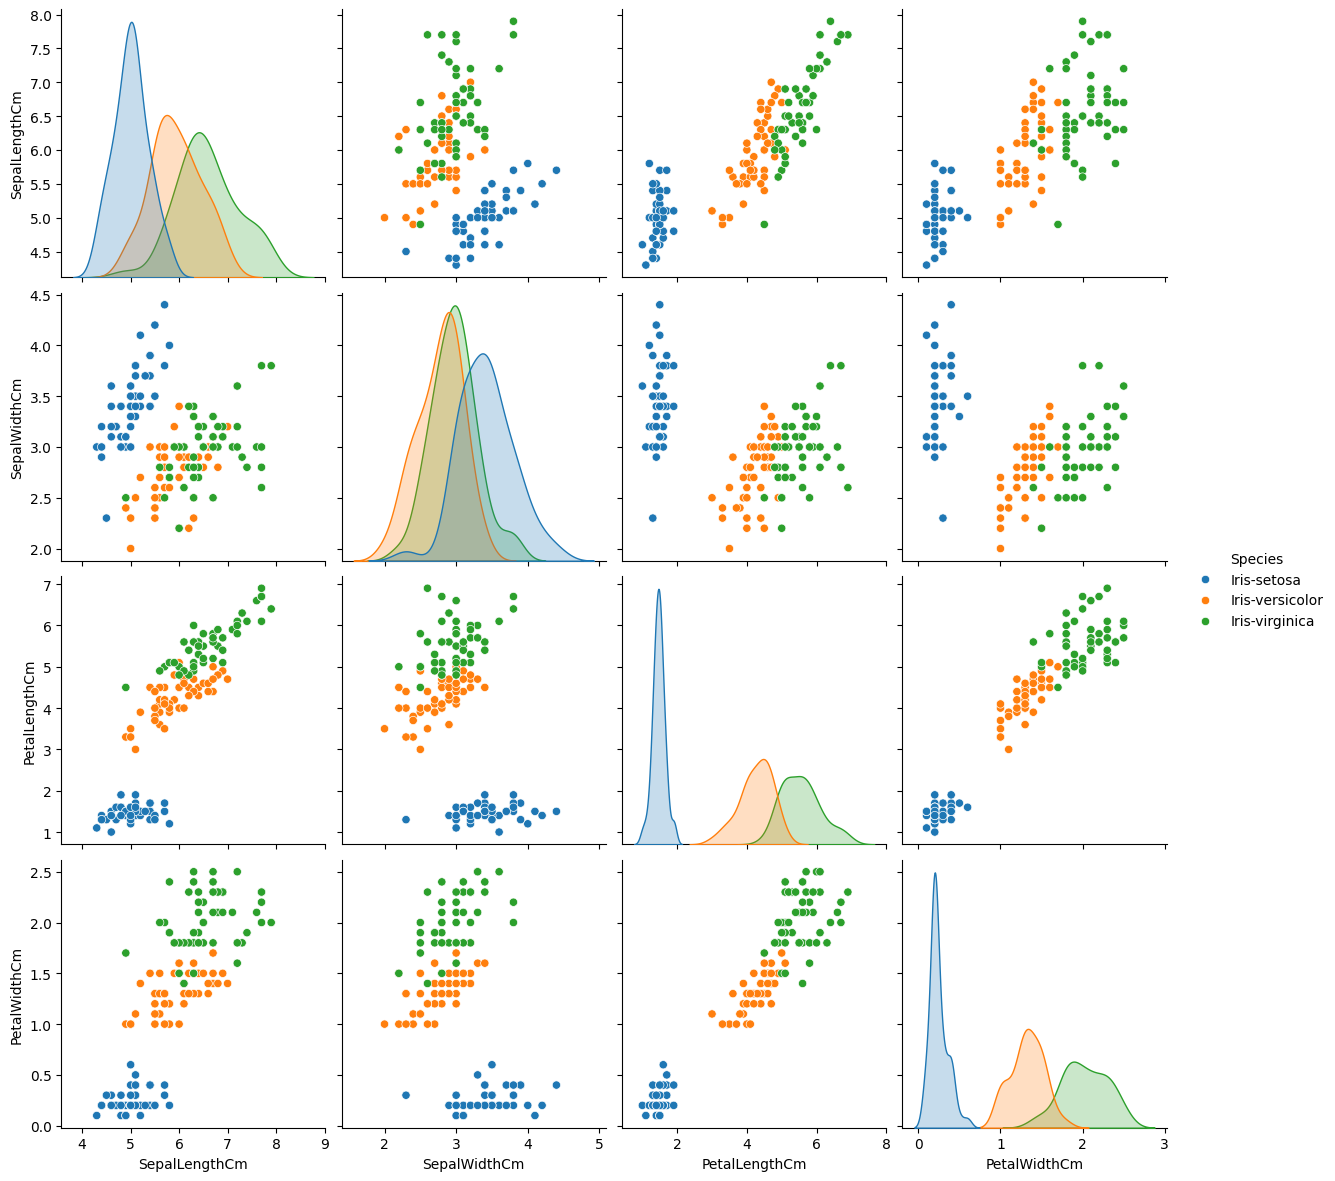

In [8]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", size=3)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f'accuracy:  {round(accuracy_score(y_test, y_pred), 2)}')
print(f'precision: {round(precision_score(y_test, y_pred, average="macro"),2)}')
print(f'recall:    {round(recall_score(y_test, y_pred, average="macro"), 2)}')
print(f'f1:        {round(f1_score(y_test, y_pred, average="macro"), 2)}')


accuracy:  0.93
precision: 0.94
recall:    0.93
f1:        0.94


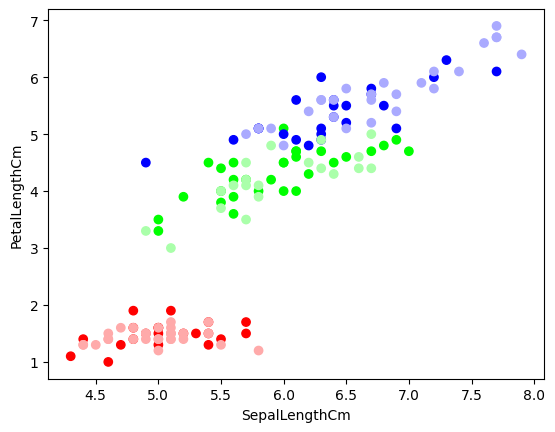

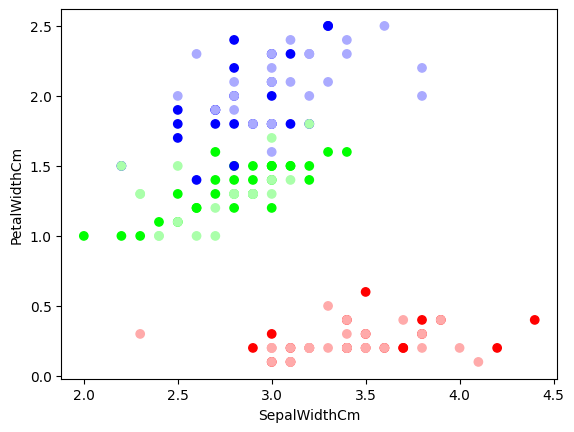

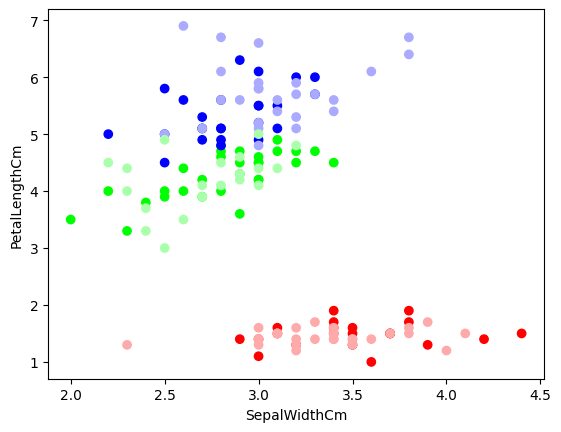

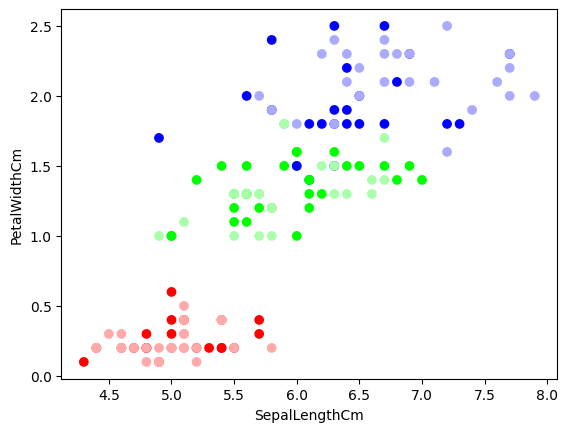

In [12]:
def plot(param1, param2):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.figure()
    plt.scatter(x_test[param1], x_test[param2], c=y_test, cmap=cmap_bold, label='Iris-setosa')
    plt.scatter(x_train[param1], x_train[param2], c=y_train, cmap=cmap_light, label='Iris-setosa')
    plt.xlabel(param1)
    plt.ylabel(param2)

plot('SepalLengthCm', 'PetalLengthCm')
plot('SepalWidthCm', 'PetalWidthCm')
plot('SepalWidthCm', 'PetalLengthCm')
plot('SepalLengthCm', 'PetalWidthCm')